# Problema 1

Dados devem ser baixados da seguinte competição no kaggle:<br>
[Link para a página do kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/)
<br>(para baixar, precisam se registrar a clicar que participa da competição mesmo que não venhamos a
submeter)
O problema a seguir é prever o valor de venda de uma casa, dado mais de 80 variáveis que
possivelmente influenciam no valor.<br>
O objetivo do trabalho é implementar o algoritmo para regressão linear univariável. Desta forma,
deverá escolher apenas 1 delas. Ou criar uma nova variável a partir das originais. Desde que use
apenas 1 variável na regressão.<br>
Neste problema, não é permitido usar biblioteca com implementações prontas. A ideia é
aprendermos a criar o método de regressão.

## Os passos para tal tarefa:


**Passo 1.** Você deverá escolher uma única variável do conjunto de dados para prever o valor de<br>
venda (SalePrice). Plote um gráfico de dispersão da variável escolhida o valor do de venda.<br>
Dica: você pode calcular a correlação (pode usar bibliotecas prontas para tal fim) de cada variável<br>
com a variável SalePrice para escolher a melhor correlacionada para o modelo. Ou pode criar<br>
nova variável a partir da existente.

**Passo 2.** Implemente a função de custo J, que calcula o erro quadrático médio.
<br>
<br>
![Imagem da equação do erro médio J](../img/imagem-equacao.png)
<br>
<br>
<br>
<br>
Lembre-se:<br>
* θ<sub>0</sub> e θ<sub>1</sub> são os parâmetros para a reta de hipótese: 1 ![Imagem theta_0 e theta_1](../img/imagem-ax+b.png) <br>
* x é a variável que você escolheu para prever o preço de venda<br>
* y é o preço de venda
* y<sup>(i)</sup>, o preço de venda para a amostra i da base de dados<br>
* h<sub>θ</sub>(x) é o valor previsto para a venda, dado um valor de x
<br>
<br>
<br>
<br>
A função J deverá receber o valor de θ<sub>0</sub>, θ<sub>1</sub> e o conjunto de dados de treino (train.csv ou qualquer<br>
outro formato, por exemplo, um DataFrame ou numpy.array, matriz…), e retornar o erro.

**Passo 3.** Implemente a função de Gradiente Descendente em modo batch para encontrar o melhor θ<sub>0</sub> e θ<sub>1</sub> para seu problema. Isto é, implemente a regressão linear.<br>
Sua função de gradiente descendente deve:
* iniciar θ<sub>0</sub> e θ<sub>1</sub> com valores 0
* receber o learning rate (α), número máximo de iterações e tolerância para convergência (ε)
* retornar melhor valor de θ<sub>0</sub> e θ<sub>1</sub>, e os custos/erros (J) em cada escolha/iteração do gradiente
descendente.
<br>
<br>
![Imagem do sistema de equações a ser resolvido](../img/sistema-de-equacoes.png)
<br>
<br>
Onde m é o número de amostras da base de treino.
<br>
<br>
Seu método deve parar quando a diferença entre 2 interações consecultivas for menor que ε ou<br>
quando atinguir o número máximo de iterações. Neste último caso, informe que o valor foi atingido.<br>
Que o método não convergiu.

**Passo 4.** Execute seu método de regressão na base de dados (gradiente descendente do passo 3) e
mostre o gráfico de dispersão com a reta que encontrou.

**Passo 5.** Modifique o learning rate. Use 3 valores diferentes (um grande, um pequeno e um<br>
intermediário), mostre os gráficos dos custos para os 3 valores e discorra sobre o que acontece no<br>
comportamento dos gráficos.
Se seus gráficos continuam muito similares, escolha outros valores, ainda maiores ou menores para o learning rate.
<br>
<br>
Se seus gráficos continuam muito similares, escolha outros valores, ainda maiores ou menores para o learning rate.

### Importando as bibliotecas necessárias

In [17]:
# https://purnasaigudikandula.medium.com/linear-regression-in-python-with-cost-function-and-gradient-descent-bde9a8d2626
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

### Criando variáveis a partir dos datasets

#### Abaixo, os dataframes não estão tratados

In [18]:
house_sale_price_raw = pd.read_csv("../databases/raw/train.csv", index_col = "Id")
# house_sale_price_test = pd.read_csv("../databases/raw/test.csv", index_col = "Id")

#### O dataframe abaixo está tratado e em formato .pkl

In [19]:
# Aqui já está o dataframe tratado
#
# house_sale_price_processed = pd.read_pickle("../databases/processed/house_sale_processed.pkl")
#

## Realizando testes com os datasets

### Imprimindo conteúdo dos datasets

#### Dataset de treino

In [20]:
house_sale_price_raw.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


#### Dataset de testes

In [21]:
# house_sale_price_test.head(10)

#### Nomes das colunas

In [22]:
print(house_sale_price_raw.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Realizando testes no dataset de treino

In [23]:
print("MSSubClass: ", house_sale_price_raw.MSSubClass.unique())
print("MSZoning: ", house_sale_price_raw.MSZoning.unique())

MSSubClass:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning:  ['RL' 'RM' 'C (all)' 'FV' 'RH']


In [24]:
print("Tipos de pavimentação da rua: ", house_sale_price_raw.Street.unique())

Tipos de pavimentação da rua:  ['Pave' 'Grvl']


In [25]:
print("Tipos de pavimento: ", house_sale_price_raw.Alley.unique())

Tipos de pavimento:  [nan 'Grvl' 'Pave']


In [26]:
print("Formas geométricas do terreno onde a casa foi construida: ", house_sale_price_raw.LotShape.unique())

Formas geométricas do terreno onde a casa foi construida:  ['Reg' 'IR1' 'IR2' 'IR3']


In [27]:
print("Contorno do terreno onde a casa foi construida: ", house_sale_price_raw.LandContour.unique())

Contorno do terreno onde a casa foi construida:  ['Lvl' 'Bnk' 'Low' 'HLS']


In [28]:
print("Datas das reformas anteriores: ", house_sale_price_raw.YearRemodAdd.unique())

Datas das reformas anteriores:  [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


In [29]:
print("Largura de frente do terreno (em pés): ", house_sale_price_raw.LotFrontage.unique())

Largura de frente do terreno (em pés):  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


In [30]:
print("Área do lote(em pés^2): ", house_sale_price_raw.LotArea.unique())

Área do lote(em pés^2):  [ 8450  9600 11250 ... 17217 13175  9717]


In [31]:
print("Área da lareira: ", house_sale_price_raw.ScreenPorch.unique())

Área da lareira:  [  0 176 198 291 252  99 184 168 130 142 192 410 224 266 170 154 153 144
 128 259 160 271 234 374 185 182  90 396 140 276 180 161 145 200 122  95
 120  60 126 189 260 147 385 287 156 100 216 210 197 204 225 152 175 312
 222 265 322 190 233  63  53 143 273 288 263  80 163 116 480 178 440 155
 220 119 165  40]


In [32]:
print("Angulação do terreno: ", house_sale_price_raw.LandSlope.unique())

Angulação do terreno:  ['Gtl' 'Mod' 'Sev']


In [33]:
print("Número de casas que possuem piscina\ne a área da piscina (se possuir):\n", house_sale_price_raw.PoolArea.value_counts().sort_index())

Número de casas que possuem piscina
e a área da piscina (se possuir):
 PoolArea
0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: count, dtype: int64


In [34]:
print("PoolQC:\n", house_sale_price_raw.PoolQC.unique())

PoolQC:
 [nan 'Ex' 'Fa' 'Gd']


In [35]:
print("Tipo de muro: ", house_sale_price_raw.Fence.unique())

Tipo de muro:  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [36]:
print("Tipo da venda: ", house_sale_price_raw.SaleType.unique())

Tipo da venda:  ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


In [37]:
print("Ano da venda: ", house_sale_price_raw.YrSold.unique())
print("Mês da venda: ", house_sale_price_raw.MoSold.unique())

Ano da venda:  [2008 2007 2006 2009 2010]
Mês da venda:  [ 2  5  9 12 10  8 11  4  1  7  3  6]


In [38]:
print("BsmtQual: ", house_sale_price_raw.BsmtQual.unique())
print("BsmtCond: ", house_sale_price_raw.BsmtCond.unique())

BsmtQual:  ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond:  ['TA' 'Gd' nan 'Fa' 'Po']


In [39]:
print("Utilidades: ", house_sale_price_raw.Utilities.unique())

Utilidades:  ['AllPub' 'NoSeWa']


In [40]:
print("Fundação da casa: ", house_sale_price_raw.Foundation.unique())

Fundação da casa:  ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


## Tratando os datasets

In [41]:
colunas = house_sale_price_raw.columns.copy(deep = True)
print(f"{len(colunas)} \n\n {colunas}")

80 

 Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive

In [42]:
colunas = ["MSSubClass", "MSZoning", "Street", "Alley", "Condition1", "Condition2", "BldgType", "MasVnrArea", "MasVnrType",
    "Exterior1st", "Exterior2nd", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2",
    "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "Heating", "HeatingQC", "CentralAir", "Electrical",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
    "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd", "Functional", "FireplaceQu", "PavedDrive",
    "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch","Fence",
    "MiscFeature", "MiscVal", "SaleType"]

### Excluindo algumas colunas 

In [43]:
house_sale_price_processed = house_sale_price_raw.drop(columns = colunas)
print("Quantidade de colunas: ", len(house_sale_price_processed.columns), "\n\n", house_sale_price_processed.columns)

Quantidade de colunas:  35 

 Index(['LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'ExterQual', 'ExterCond', 'Foundation', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PoolArea', 'PoolQC', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice'],
      dtype='object')


### Excluindo mais algumas colunas
Foi decidido trabalhar com 15 ou menos colunas

In [44]:
colunas = ["LandContour", "Utilities", "LotConfig",
    "HouseStyle", "OverallQual", "RoofStyle", "RoofMatl",
    "GarageType", "GarageYrBlt", "GarageFinish", "MoSold",
    "SaleCondition", "OverallCond", "Foundation", "GarageQual",
    "GarageCond", "PoolQC"
    ]

print(len(colunas))

17


In [45]:
house_sale_price_processed = house_sale_price_processed.drop(columns = colunas)
print("Quantidade de colunas: ", len(house_sale_price_processed.columns), "\n\n", house_sale_price_processed.columns)

Quantidade de colunas:  18 

 Index(['LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'Neighborhood',
       'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PoolArea', 'YrSold', 'SalePrice'],
      dtype='object')


### Verificando dados faltantes - *NaN*s

In [46]:
house_sale_price_processed.isna().any()

LotFrontage      True
LotArea         False
LotShape        False
LandSlope       False
Neighborhood    False
YearBuilt       False
YearRemodAdd    False
ExterQual       False
ExterCond       False
FullBath        False
HalfBath        False
BedroomAbvGr    False
Fireplaces      False
GarageCars      False
GarageArea      False
PoolArea        False
YrSold          False
SalePrice       False
dtype: bool

### Removendo valores nulos/faltantes - *NaN*s

In [47]:
mediana = house_sale_price_processed.LotFrontage.median()
print(mediana)

69.0


#### Vamos tornar todos os valores *NaN*s em valores equivalentes à média da série

In [48]:
house_sale_price_processed.LotFrontage = house_sale_price_processed.LotFrontage.fillna(mediana)
house_sale_price_processed.isna().any()

LotFrontage     False
LotArea         False
LotShape        False
LandSlope       False
Neighborhood    False
YearBuilt       False
YearRemodAdd    False
ExterQual       False
ExterCond       False
FullBath        False
HalfBath        False
BedroomAbvGr    False
Fireplaces      False
GarageCars      False
GarageArea      False
PoolArea        False
YrSold          False
SalePrice       False
dtype: bool

### Verificando os tipos das colunas

In [49]:
print(house_sale_price_processed.dtypes)

LotFrontage     float64
LotArea           int64
LotShape         object
LandSlope        object
Neighborhood     object
YearBuilt         int64
YearRemodAdd      int64
ExterQual        object
ExterCond        object
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
Fireplaces        int64
GarageCars        int64
GarageArea        int64
PoolArea          int64
YrSold            int64
SalePrice         int64
dtype: object


In [50]:
print("Máximo", house_sale_price_processed.LotFrontage.max(), "\n\nMínimo", house_sale_price_processed.LotFrontage.min())

Máximo 313.0 

Mínimo 21.0


In [51]:
print("Área do lote\n")
print("Máximo", house_sale_price_processed.LotArea.max(), "\nMínimo", house_sale_price_processed.LotArea.min())

print("\n\nAno no qual foi construido\n")
print("Máximo", house_sale_price_processed.YearBuilt.max(), "\nMínimo", house_sale_price_processed.YearBuilt.min())

print("\n\nAno no qual foi remodelado\n")
print("Máximo", house_sale_price_processed.YearRemodAdd.max(), "\nMínimo", house_sale_price_processed.YearRemodAdd.min())

print("\n\nBanheiro\n")
print("Máximo", house_sale_price_processed.FullBath.max(), "\nMínimo", house_sale_price_processed.FullBath.min())

Área do lote

Máximo 215245 
Mínimo 1300


Ano no qual foi construido

Máximo 2010 
Mínimo 1872


Ano no qual foi remodelado

Máximo 2010 
Mínimo 1950


Banheiro

Máximo 3 
Mínimo 0


In [52]:
print("\n\nLavabo\n")
print("Máximo", house_sale_price_processed.HalfBath.max(), "\nMínimo", house_sale_price_processed.HalfBath.min())

print("\n\nOs quartos\n")
print("Máximo", house_sale_price_processed.BedroomAbvGr.max(), "\nMínimo", house_sale_price_processed.BedroomAbvGr.min())

print("\n\nLareiras\n")
print("Máximo", house_sale_price_processed.Fireplaces.max(), "\nMínimo", house_sale_price_processed.Fireplaces.min())

print("\n\nQuantidade de carros na garagem\n")
print("Máximo", house_sale_price_processed.GarageCars.max(), "\nMínimo", house_sale_price_processed.GarageCars.min())



Lavabo

Máximo 2 
Mínimo 0


Os quartos

Máximo 8 
Mínimo 0


Lareiras

Máximo 3 
Mínimo 0


Quantidade de carros na garagem

Máximo 4 
Mínimo 0


In [53]:
print("\n\nÁrea da garagem\n")
print("Máximo", house_sale_price_processed.GarageArea.max(), "\nMínimo", house_sale_price_processed.GarageArea.min())

print("\n\nÁrea da piscina\n")
print("Máximo", house_sale_price_processed.PoolArea.max(), "\nMínimo", house_sale_price_processed.PoolArea.min())

print("\n\nAno no qual foi vendida\n")
print("Máximo", house_sale_price_processed.YrSold.max(), "\nMínimo", house_sale_price_processed.YrSold.min())

print("\n\nPreço de venda\n")
print("Máximo", house_sale_price_processed.SalePrice.max(), "\nMínimo", house_sale_price_processed.SalePrice.min())



Área da garagem

Máximo 1418 
Mínimo 0


Área da piscina

Máximo 738 
Mínimo 0


Ano no qual foi vendida

Máximo 2010 
Mínimo 2006


Preço de venda

Máximo 755000 
Mínimo 34900


### Alterando os tipos das colunas acima para um tipo de dado menos custoso

#### Valores numéricos

In [54]:
house_sale_price_processed.LotFrontage = house_sale_price_processed.LotFrontage.astype("uint8")

house_sale_price_processed.LotArea = house_sale_price_processed.LotArea.astype("uint32")
house_sale_price_processed.YearBuilt = house_sale_price_processed.YearBuilt.astype("uint16")
house_sale_price_processed.YearRemodAdd = house_sale_price_processed.YearRemodAdd.astype("uint16")
house_sale_price_processed.FullBath = house_sale_price_processed.FullBath.astype("uint8")

house_sale_price_processed.HalfBath = house_sale_price_processed.HalfBath.astype("uint8")
house_sale_price_processed.BedroomAbvGr = house_sale_price_processed.BedroomAbvGr.astype("uint8")
house_sale_price_processed.Fireplaces = house_sale_price_processed.Fireplaces.astype("uint8")
house_sale_price_processed.GarageCars = house_sale_price_processed.GarageCars.astype("uint8")

house_sale_price_processed.GarageArea = house_sale_price_processed.GarageArea.astype("uint16")
house_sale_price_processed.PoolArea = house_sale_price_processed.PoolArea.astype("uint16")
house_sale_price_processed.YrSold = house_sale_price_processed.YrSold.astype("uint16")
house_sale_price_processed.SalePrice = house_sale_price_processed.SalePrice.astype("uint32")

#### Valores não numéricos

In [55]:
house_sale_price_processed.LotShape = house_sale_price_processed.LotShape.astype("category")
house_sale_price_processed.LandSlope = house_sale_price_processed.LandSlope.astype("category")
house_sale_price_processed.Neighborhood = house_sale_price_processed.Neighborhood.astype("category")
house_sale_price_processed.ExterQual = house_sale_price_processed.ExterQual.astype("category")
house_sale_price_processed.ExterCond = house_sale_price_processed.ExterCond.astype("category")

In [56]:
house_sale_price_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   LotFrontage   1460 non-null   uint8   
 1   LotArea       1460 non-null   uint32  
 2   LotShape      1460 non-null   category
 3   LandSlope     1460 non-null   category
 4   Neighborhood  1460 non-null   category
 5   YearBuilt     1460 non-null   uint16  
 6   YearRemodAdd  1460 non-null   uint16  
 7   ExterQual     1460 non-null   category
 8   ExterCond     1460 non-null   category
 9   FullBath      1460 non-null   uint8   
 10  HalfBath      1460 non-null   uint8   
 11  BedroomAbvGr  1460 non-null   uint8   
 12  Fireplaces    1460 non-null   uint8   
 13  GarageCars    1460 non-null   uint8   
 14  GarageArea    1460 non-null   uint16  
 15  PoolArea      1460 non-null   uint16  
 16  YrSold        1460 non-null   uint16  
 17  SalePrice     1460 non-null   uint32  
dtypes: category(5

### Nomalizando os dados numéricos via min-max-scaling

In [57]:
copia = house_sale_price_processed.copy(deep = True)
colunas_nomalizaveis = [coluna for coluna in house_sale_price_processed.columns if house_sale_price_processed[coluna].name not in ["LotShape", "LandSlope", "Neighborhood", "ExterQual", "ExterCond", "YearBuilt", "YearRemodAdd"]]

for column in colunas_nomalizaveis:
	copia[column] = (house_sale_price_processed[column] - house_sale_price_processed[column].min()) / (house_sale_price_processed[column].max() - house_sale_price_processed[column].min())	

print(copia)


      LotFrontage   LotArea LotShape LandSlope Neighborhood  YearBuilt  \
Id                                                                       
1        0.273292  0.033420      Reg       Gtl      CollgCr       2003   
2        0.366460  0.038795      Reg       Gtl      Veenker       1976   
3        0.291925  0.046507      IR1       Gtl      CollgCr       2001   
4        0.242236  0.038561      IR1       Gtl      Crawfor       1915   
5        0.391304  0.060576      IR1       Gtl      NoRidge       2000   
...           ...       ...      ...       ...          ...        ...   
1456     0.254658  0.030929      Reg       Gtl      Gilbert       1999   
1457     0.397516  0.055505      Reg       Gtl       NWAmes       1978   
1458     0.279503  0.036187      Reg       Gtl      Crawfor       1941   
1459     0.291925  0.039342      Reg       Gtl        NAmes       1950   
1460     0.335404  0.040370      Reg       Gtl      Edwards       1965   

      YearRemodAdd ExterQual ExterCon

##### Retornando a cópia ao original

In [58]:
house_sale_price_processed = copia

### Salvando tabela tratada em um novo arquivo
#### Formato .pkl foi escolhido

#### Salvando em /databases/processed/

In [59]:
# Se quiser salvar descomentar bloco a seguir
#
# house_sale_price_processed.to_pickle(path = "../databases/processed/house_sale_processed.pkl")
#

## Funções auxiliares para plotar gráficos

### Gráficos de dispersão

In [60]:
def funcao_dispersao (X:pd.Series, Y:pd.Series, titulo:str="Gráfico de dispersão", label_x:str="eixo x", label_y:str="eixo y") -> None:
    figure, _ = plt.subplots(figsize = (12, 6))
    plt.scatter(
        x = X,
        y = Y,
    )
    plt.title(titulo)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()


def funcao_linear(X:pd.Series, Y:pd.Series, titulo:str="Gráfico linear", label_x:str="eixo x", label_y:str="eixo y", cor:str="red") -> None:
    figure, _ = plt.subplots(figsize = (12, 6))
    plt.plot(
        X,
        Y,
        color = cor
    )
    plt.title(titulo)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()


## Implementação do **Passo 1**

### Escolhendo a variável com base na variância, correlação e covariância

#### A variância:

In [61]:
print("Frente do terreno: ", np.var(house_sale_price_processed.LotFrontage))
print("Área do terreno: ", np.var(house_sale_price_processed.LotArea))
print("Ano no qual a casa foi contruida: ", np.var(house_sale_price_processed.YearBuilt))
print("Ano no qual a casa remodelada: ", np.var(house_sale_price_processed.YearRemodAdd))
print("Quantidade de banheiros: ", np.var(house_sale_price_processed.FullBath))
print("Quantidade de lavabos: ", np.var(house_sale_price_processed.HalfBath))
print("Área dos quartos (em média): ", np.var(house_sale_price_processed.BedroomAbvGr))
print("Quantidade de lareiras: ", np.var(house_sale_price_processed.Fireplaces))
print("Quantidade de carros na garagem: ", np.var(house_sale_price_processed.GarageCars))
print("Área da garagem: ", np.var(house_sale_price_processed.GarageArea))
print("Tamanho da piscina: ", np.var(house_sale_price_processed.PoolArea))

Frente do terreno:  0.015586208271912762
Área do terreno:  0.002175050375804109
Ano no qual a casa foi contruida:  911.590607524864
Ano no qual a casa remodelada:  425.94088196659794
Quantidade de banheiros:  0.033700037530493526
Quantidade de lavabos:  0.06318012291236631
Área dos quartos (em média):  0.01039121874413586
Quantidade de lareiras:  0.046145566189195374
Quantidade de carros na garagem:  0.03488107524863952
Área da garagem:  0.022718782035919493
Tamanho da piscina:  0.00296177019470023


#### A correlação:

In [62]:
print("Frente do terreno: ", np.correlate(house_sale_price_processed.LotFrontage, house_sale_price_processed.SalePrice))
print("Área do terreno: ", np.correlate(house_sale_price_processed.LotArea, house_sale_price_processed.SalePrice))
print("Ano no qual a casa foi contruida: ", np.correlate(house_sale_price_processed.YearBuilt, house_sale_price_processed.SalePrice))
print("Ano no qual a casa remodelada: ", np.correlate(house_sale_price_processed.YearRemodAdd, house_sale_price_processed.SalePrice))
print("Quantidade de banheiros: ", np.correlate(house_sale_price_processed.FullBath, house_sale_price_processed.SalePrice))
print("Quantidade de lavabos: ", np.correlate(house_sale_price_processed.HalfBath, house_sale_price_processed.SalePrice))
print("Área dos quartos (em média): ", np.correlate(house_sale_price_processed.BedroomAbvGr, house_sale_price_processed.SalePrice))
print("Quantidade de lareiras: ", np.correlate(house_sale_price_processed.Fireplaces, house_sale_price_processed.SalePrice))
print("Quantidade de carros na garagem: ", np.correlate(house_sale_price_processed.GarageCars, house_sale_price_processed.SalePrice))
print("Área da garagem: ", np.correlate(house_sale_price_processed.GarageArea, house_sale_price_processed.SalePrice))
print("Tamanho da piscina: ", np.correlate(house_sale_price_processed.PoolArea, house_sale_price_processed.SalePrice))

Frente do terreno:  [96.49260483]
Área do terreno:  [14.73553684]
Ano no qual a casa foi contruida:  [586150.48473129]
Ano no qual a casa remodelada:  [589319.35760728]
Quantidade de banheiros:  [171.02230986]
Quantidade de lavabos:  [68.17514442]
Área dos quartos (em média):  [108.83973459]
Quantidade de lareiras:  [76.6460237]
Quantidade de carros na garagem:  [150.05073254]
Área da garagem:  [113.88147923]
Tamanho da piscina:  [1.91647513]


#### A covariância

In [63]:
print("Frente do terreno: ", np.cov(house_sale_price_processed.LotFrontage, house_sale_price_processed.SalePrice))
print("Área do terreno: ", np.cov(house_sale_price_processed.LotArea, house_sale_price_processed.SalePrice))
print("Ano no qual a casa foi contruida: ", np.cov(house_sale_price_processed.YearBuilt, house_sale_price_processed.SalePrice))
print("Ano no qual a casa remodelada: ", np.cov(house_sale_price_processed.YearRemodAdd, house_sale_price_processed.SalePrice))
print("Quantidade de banheiros: ", np.cov(house_sale_price_processed.FullBath, house_sale_price_processed.SalePrice))
print("Quantidade de lavabos: ", np.cov(house_sale_price_processed.HalfBath, house_sale_price_processed.SalePrice))
print("Área dos quartos (em média): ", np.cov(house_sale_price_processed.BedroomAbvGr, house_sale_price_processed.SalePrice))
print("Quantidade de lareiras: ", np.cov(house_sale_price_processed.Fireplaces, house_sale_price_processed.SalePrice))
print("Quantidade de carros na garagem: ", np.cov(house_sale_price_processed.GarageCars, house_sale_price_processed.SalePrice))
print("Área da garagem: ", np.cov(house_sale_price_processed.GarageArea, house_sale_price_processed.SalePrice))
print("Tamanho da piscina: ", np.cov(house_sale_price_processed.PoolArea, house_sale_price_processed.SalePrice))

Frente do terreno:  [[0.01559689 0.00499224]
 [0.00499224 0.01217083]]
Área do terreno:  [[0.00217654 0.00135797]
 [0.00135797 0.01217083]]
Ano no qual a casa foi contruida:  [[9.12215413e+02 1.74230923e+00]
 [1.74230923e+00 1.21708305e-02]]
Ano no qual a casa remodelada:  [[4.26232822e+02 1.15498938e+00]
 [1.15498938e+00 1.21708305e-02]]
Quantidade de banheiros:  [[0.03372314 0.01135865]
 [0.01135865 0.01217083]]
Quantidade de lavabos:  [[0.06322343 0.00788101]
 [0.00788101 0.01217083]]
Área dos quartos (em média):  [[0.01039834 0.00189235]
 [0.00189235 0.01217083]]
Quantidade de lareiras:  [[0.04617719 0.01106941]
 [0.01106941 0.01217083]]
Quantidade de carros na garagem:  [[0.03490498 0.01319962]
 [0.01319962 0.01217083]]
Área da garagem:  [[0.02273435 0.01037027]
 [0.01037027 0.01217083]]
Tamanho da piscina:  [[0.0029638  0.00055497]
 [0.00055497 0.01217083]]


### Plotando o gráfico de dispersão

#### Visto variância, correlação e covariância,<br>foi escolhido a coluna (variável) YearBuilt - Ano no qual a casa foi construida

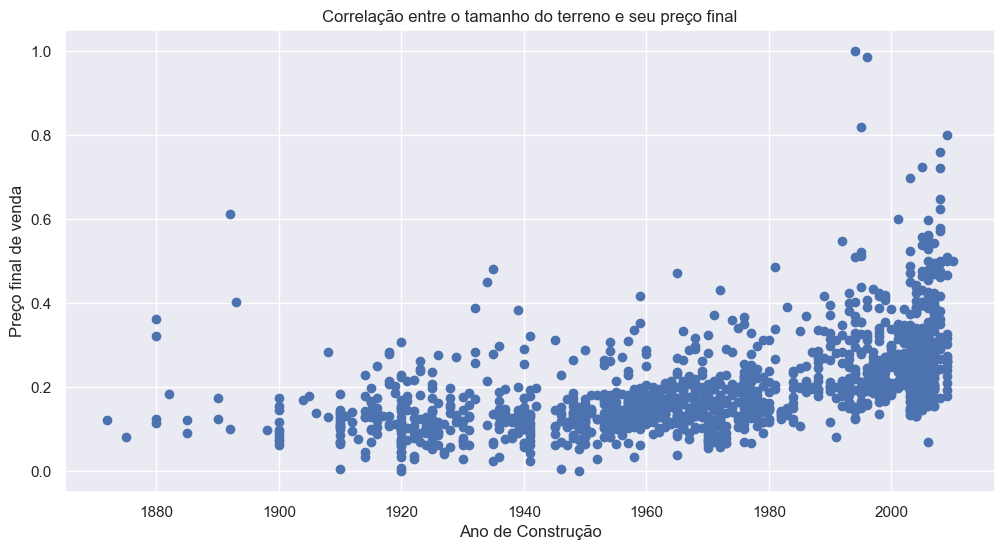

In [64]:
funcao_dispersao(
    house_sale_price_processed.YearBuilt,
    house_sale_price_processed.SalePrice,
    "Correlação entre o tamanho do terreno e seu preço final",
    "Ano de Construção",
    "Preço final de venda"
)

## Implementação do **Passo 2**

### Função auxiliar para calcular o valor de h<sub>θ</sub>(x<sup>(i)</sup>)

In [65]:
def funcao_h_theta(x:float, theta_0:float=1.0, theta_1:float=0.5) -> float:
    return (theta_0 + (theta_1 * x))


### Função de custo *J*

In [66]:
def funcao_de_custo(parameter: pd.Series, target: pd.Series, theta_0:float=1.0, theta_1:float=0.5) -> float:
    somatorio = 0.0
    
    for i in range(1, len(parameter) + 1):
        h_theta = funcao_h_theta(parameter[i], theta_0, theta_1)
        somatorio = somatorio + ((h_theta - target[i]) ** 2)
    
    return (somatorio / (2 * parameter.shape[0]))
    

## Implementação do **Passo 3**

### Função auxiliar para calcular (h<sub>θ</sub>(x<sup>(i)</sup>) - y<sup>(i)</sup>)

In [67]:
def calcula_theta(x:pd.Series, y:pd.Series, theta_0:float, theta_1:float, tamanho:int) -> float:
    h_theta = 0.0
    
    for i in range(1, tamanho + 1):
        h_theta = (funcao_h_theta(x[i], theta_0, theta_1) - y[i])
    
    return h_theta


### Função gradiente descendente

In [68]:
def funcao_gradiente_descendente(x:pd.Series, y:pd.Series, alpha:float, max_iter:int=20, tolerancia:float=0.002) -> (float, float):
    tamanho = x.shape[0]
    theta_0 = 0.0
    theta_1 = 0.0
    sucesso = 0
    
    for i in range(1, max_iter + 1):
        theta_0_temp = alpha * calcula_theta(x, y, theta_0, theta_1, tamanho) / tamanho
        theta_1_temp = alpha * (calcula_theta(x, y, theta_0, theta_1, tamanho) * x[i]) / tamanho
        theta_0 = theta_0 - theta_0_temp
        theta_1 = theta_1 - theta_1_temp
        
        
        if funcao_de_custo(x, y, theta_0, theta_1) <= tolerancia:
            sucesso = sucesso + 1
            
            if sucesso == 2:
                return theta_0, theta_1
        else:
            sucesso = 0
        
    raise Exception("O número máximo de iterações foi atingido!!!\nO método não convergiu!")


## Implementação do **Passo 4**

### Executando a Função Gradiente Descendente

Os parâmetros são:
* x = Ano no qual a casa foi construiida (*YearBuilt*)
* y = Preço final de venda (*SalePrice*)

In [69]:
# Abaixo é o valor de alpha
#
alpha = 0.0005

#
# Abaixo é o valor máximo de iterações (m)
#
max_iter = 5000

#
# Abaixo é o valor de tolerância (ε)
#
tolerancia = 0.02

#
# Executando a Função Gradiente Descendente
# 
theta_0, theta_1 = funcao_gradiente_descendente(house_sale_price_processed.YearBuilt, house_sale_price_processed.SalePrice, alpha, max_iter, tolerancia)

#### Imprimindo os valores retornados da função gradiente descendente

In [70]:
print(f"""
      O valor de θ_0 é: {theta_0}
      O valor de θ_1 é: {theta_1}
    """)


      O valor de θ_0 é: 3.4919703063488414e-08
      O valor de θ_1 é: 7.044719408328458e-05
    


### Plotando os gráficos: dispersão e reta

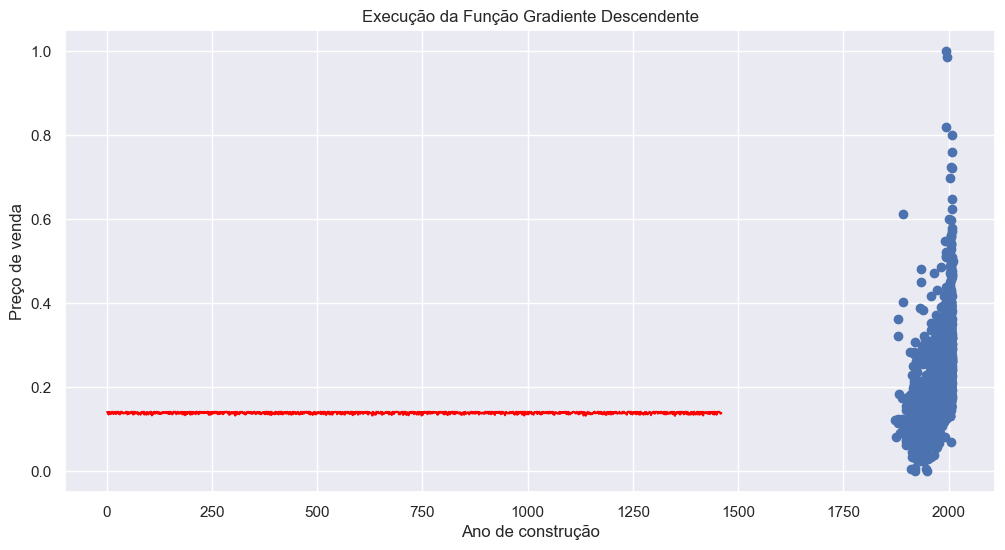

In [71]:
figure, _ = plt.subplots(figsize = (12, 6))
plt.scatter(
    house_sale_price_processed.YearBuilt,
    house_sale_price_processed.SalePrice
)
plt.plot(
    theta_0 + theta_1 * house_sale_price_processed.YearBuilt,
    color = "red"
)
plt.title("Execução da Função Gradiente Descendente")
plt.xlabel("Ano de construção")
plt.ylabel("Preço de venda")
plt.show()

## Implementação do **Passo 5**

### Escolhendo 3 valores distintos para 3 alfas

In [102]:
# Valor muito pequeno
alpha_pequeno = 0.00001

#
# Valor intermediario
alpha = 0.0001

#
# valor muito grande
alpha_grande = 0.0005

### Executando a Função de Custos

#### Adaptação da Função Gradiente Descendente para retornar somente o vetor de custos

In [104]:
def funcao_gradiente_descendente(x:pd.Series, y:pd.Series, alpha:float, max_iter:int=20, tolerancia:float=0.002) -> (list):
    tamanho = x.shape[0]
    theta_0 = 0.0
    theta_1 = 0.0
    sucesso = 0
    vetor_de_custos = []
    
    for i in range(1, max_iter + 1):
        theta_0_temp = alpha * calcula_theta(x, y, theta_0, theta_1, tamanho) / tamanho
        theta_1_temp = alpha * (calcula_theta(x, y, theta_0, theta_1, tamanho) * x[i]) / tamanho
        theta_0 = theta_0 - theta_0_temp
        theta_1 = theta_1 - theta_1_temp
        vetor_de_custos.append(funcao_de_custo(x, y, theta_0, theta_1))
        
        if vetor_de_custos[i - 1] <= tolerancia:
            sucesso = sucesso + 1
            
            if sucesso == 2:
                return vetor_de_custos
        else:
            sucesso = 0
        
    raise Exception("O número máximo de iterações foi atingido!!!\nO método não convergiu!")

#### Alfa Muito Pequeno

In [105]:
#
# Abaixo é o valor máximo de iterações (m)
#
max_iter = 5000

#
# Abaixo é o valor de tolerância (ε)
#
tolerancia = 0.02

#
# Executando a Função Gradiente Descendente
# 

vetor_de_custos_pequeno = funcao_gradiente_descendente(house_sale_price_processed.YearBuilt, house_sale_price_processed.SalePrice, alpha_pequeno, max_iter, tolerancia)

#### Alfa Médio

In [106]:
#
# Abaixo é o valor máximo de iterações (m)
#
max_iter = 5000

#
# Abaixo é o valor de tolerância (ε)
#
tolerancia = 0.02

#
# Executando a Função Gradiente Descendente
# 
vetor_de_custos = funcao_gradiente_descendente(house_sale_price_processed.YearBuilt, house_sale_price_processed.SalePrice, alpha, max_iter, tolerancia)

#### Alfa Muito Grande

In [107]:
#
# Abaixo é o valor máximo de iterações (m)
#
max_iter = 5000

#
# Abaixo é o valor de tolerância (ε)
#
tolerancia = 0.02

#
# Executando a Função Gradiente Descendente
# 
vetor_de_custos_grande = funcao_gradiente_descendente(house_sale_price_processed.YearBuilt, house_sale_price_processed.SalePrice, alpha_grande, max_iter, tolerancia)

### Plotando os vetores de custo criados acima

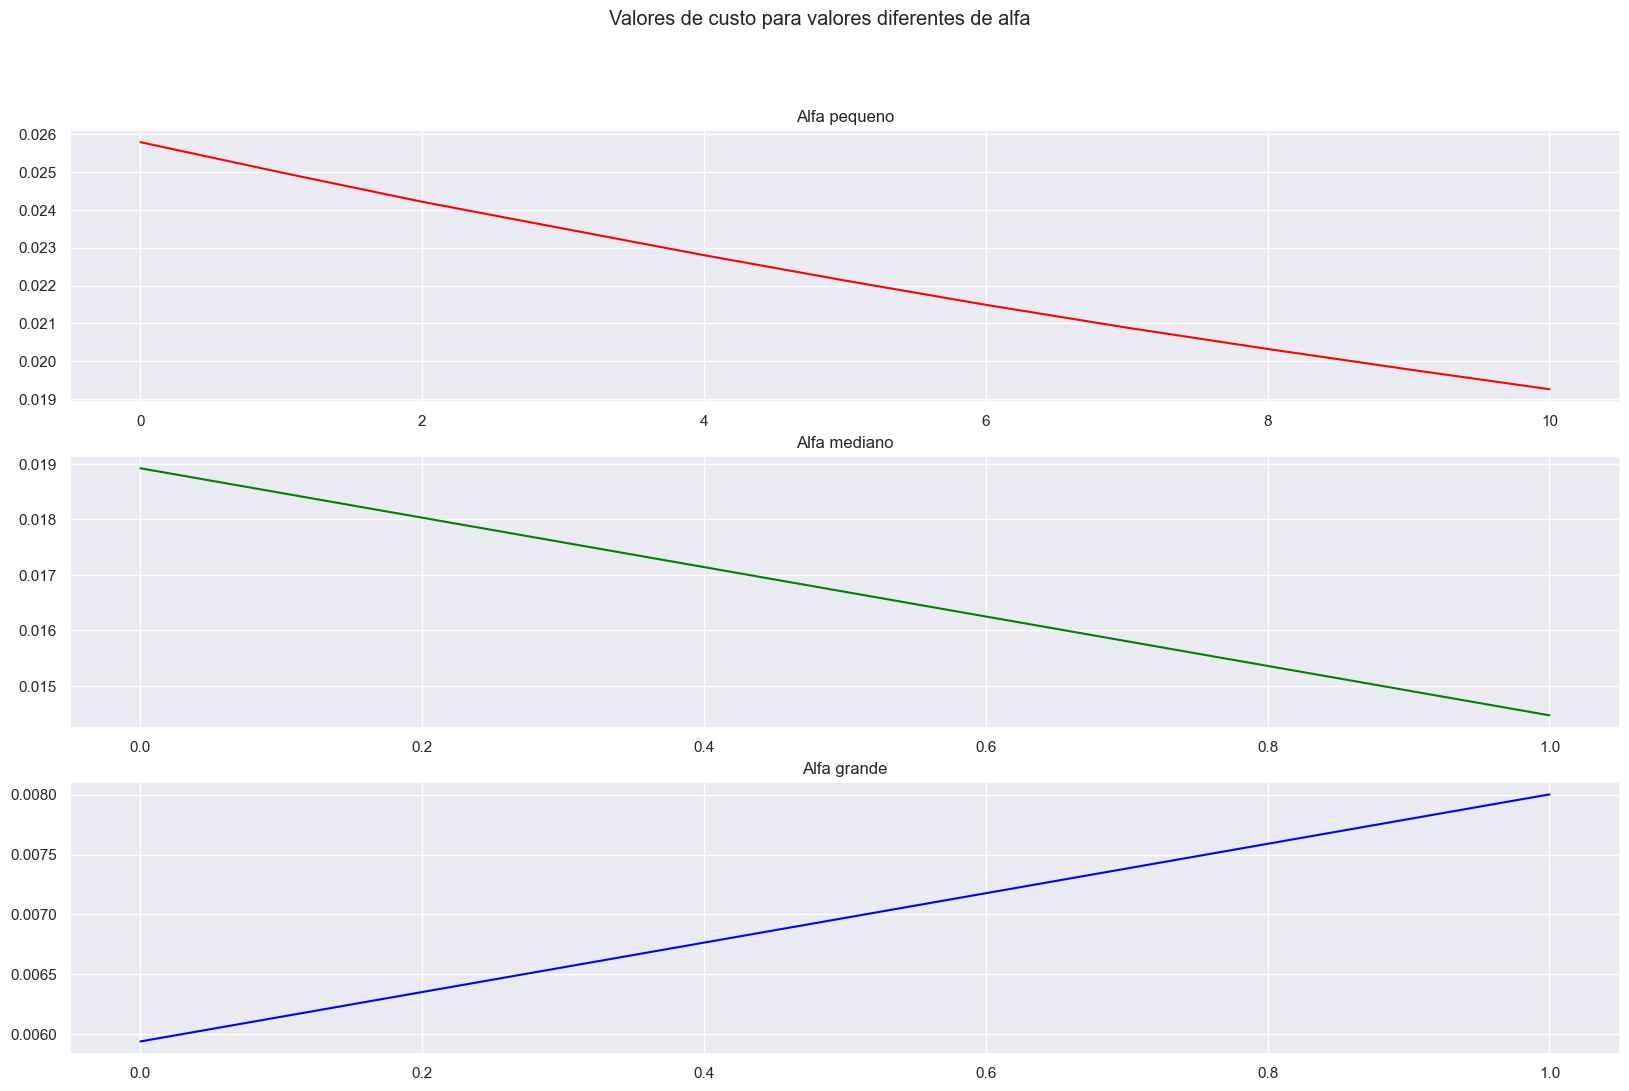

In [108]:
figure, axis = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 12))
figure.suptitle("Valores de custo para valores diferentes de alfa")
axis[0].plot(
    vetor_de_custos_pequeno,
    color = "red"
)
axis[1].plot(
    vetor_de_custos,
    color = "green"
)
axis[2].plot(
    vetor_de_custos_grande,
    color = "blue"
)
axis[0].set_title("Alfa pequeno")
axis[1].set_title("Alfa mediano")
axis[2].set_title("Alfa grande")
plt.show()

### Discorrendo sobre o resultado acima

Para o valor de alfa pequeno, a Função Gradiente Descendente demorou muito mais para convergir, 10 segundos, enquanto para os outros dois valores de alfa, houve convergencia em 1 segundo.
<br>
Para o valor de alfa mediano, a Função Gradiente Descendente obteve um comportamento similar ao comportamento alfa pequeno, porém houve a convergencia em 1 segundo e o gráfico de alfa pequeno é uma parábola com sua concavidade muito suave.
<br>
para o valor de alfa grande, a Função Gradiente Descendente teve custo positivo, crescendo a partir do valor 0.006 até o valor 0.008, quando houve a convergência. Seu comportamento foi o único ascendente.